<a href="https://colab.research.google.com/github/mohammedterry/NLP_for_ML/blob/master/NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
example_document = '''
Friday 9/11/2018
9th November 2018

Hey ho !
Can i have your contact details, please? 
aaha aaahhhh ah ahah ahahah ahh ahhahahaha hahaha hahahah
Sure. 
My email is mohammed@cognitionx.io and my phone number is 0743423453 0 01 012 1987 98 0.32 2.34 

The Matrix is a 1999 science fiction action film written and directed by The Wachowskis, starring Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving, and Joe Pantoliano.
'''

# Flair

In [13]:
!pip3 install flair
from flair.data import Sentence
from flair.models import SequenceTagger
flair_4class = SequenceTagger.load('ner')
flair_12class = SequenceTagger.load('ner-ontonotes')

2019-03-11 12:53:38,011 loading file /root/.flair/models/en-ner-conll03-v0.4.pt
2019-03-11 12:53:40,376 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/models-v0.2/NER-ontoner--h256-l1-b32-%2Bcrawl%2Bnews-forward%2Bnews-backward--v0.2/en-ner-ontonotes-v0.3.pt not found in cache, downloading to /tmp/tmpcobte1nw


100%|██████████| 1508802050/1508802050 [00:52<00:00, 28752165.06B/s]

2019-03-11 12:54:33,525 copying /tmp/tmpcobte1nw to cache at /root/.flair/models/en-ner-ontonotes-v0.3.pt


2019-03-11 12:54:45,650 removing temp file /tmp/tmpcobte1nw
2019-03-11 12:54:45,652 loading file /root/.flair/models/en-ner-ontonotes-v0.3.pt


In [23]:
s = Sentence(example_document)
flair_12class.predict(s)
s.to_dict(tag_type='ner')

{'entities': [{'confidence': 0.6401792913675308,
   'end_pos': 40,
   'start_pos': 0,
   'text': '\nFriday 9/11/2018\n9th November 2018\n\nHey',
   'type': 'DATE'},
  {'confidence': 0.3553961515426636,
   'end_pos': 223,
   'start_pos': 222,
   'text': '0',
   'type': 'CARDINAL'},
  {'confidence': 0.548831582069397,
   'end_pos': 230,
   'start_pos': 227,
   'text': '012',
   'type': 'CARDINAL'},
  {'confidence': 0.6736858785152435,
   'end_pos': 248,
   'start_pos': 236,
   'text': '98 0.32 2.34',
   'type': 'CARDINAL'},
  {'confidence': 0.4900788962841034,
   'end_pos': 261,
   'start_pos': 255,
   'text': 'Matrix',
   'type': 'PRODUCT'},
  {'confidence': 0.9999772310256958,
   'end_pos': 271,
   'start_pos': 267,
   'text': '1999',
   'type': 'DATE'},
  {'confidence': 0.9013994336128235,
   'end_pos': 339,
   'start_pos': 328,
   'text': 'Wachowskis,',
   'type': 'PERSON'},
  {'confidence': 0.9939338564872742,
   'end_pos': 362,
   'start_pos': 349,
   'text': 'Keanu Reeves,',
   't

In [0]:
def flair_4ner(document):
  s = Sentence(document)
  flair_4class.predict(s)
  entities = s.to_dict(tag_type='ner')
  return [(entity["text"], entity["type"]) for entity in entities["entities"]]

def flair_12ner(document):
  s = Sentence(document)
  flair_12class.predict(s)
  entities = s.to_dict(tag_type='ner')
  return [(entity["text"], entity["type"]) for entity in entities["entities"]]

In [17]:
flair_4ner(example_document)

[('The Wachowskis,', 'PER'),
 ('Keanu Reeves,', 'PER'),
 ('Laurence Fishburne,', 'PER'),
 ('Carrie-Anne Moss,', 'PER'),
 ('Hugo Weaving,', 'PER'),
 ('Joe Pantoliano.\n', 'PER')]

In [18]:
flair_12ner(example_document)

[('\nFriday 9/11/2018\n9th November 2018\n\nHey', 'DATE'),
 ('0', 'CARDINAL'),
 ('012', 'CARDINAL'),
 ('98 0.32 2.34', 'CARDINAL'),
 ('Matrix', 'PRODUCT'),
 ('1999', 'DATE'),
 ('Wachowskis,', 'PERSON'),
 ('Keanu Reeves,', 'PERSON'),
 ('Laurence Fishburne,', 'PERSON'),
 ('Carrie-Anne Moss,', 'PERSON'),
 ('Hugo Weaving,', 'PERSON'),
 ('Joe Pantoliano.\n', 'PERSON')]

# GATE API (Free)

In [24]:
import requests
url = "https://cloud-api.gate.ac.uk/process-document/annie-named-entity-recognizer"
headers = {'Content-Type': 'text/plain'}
response = requests.post(url, data=example_document, headers=headers).json()

import json
print(json.dumps(response, indent=2))

{
  "text": "\nFriday 9/11/2018\n9th November 2018\n\nHey ho !\nCan i have your contact details, please? \naaha aaahhhh ah ahah ahahah ahh ahhahahaha hahaha hahahah\nSure. \nMy email is mohammed@cognitionx.io and my phone number is 0743423453 0 01 012 1987 98 0.32 2.34 \n\nThe Matrix is a 1999 science fiction action film written and directed by The Wachowskis, starring Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving, and Joe Pantoliano.\n",
  "entities": {
    "Address": [
      {
        "indices": [
          165,
          187
        ],
        "kind": "email",
        "rule": "Emailaddress1",
        "ruleFinal": "EmailFinal"
      }
    ],
    "Date": [
      {
        "indices": [
          1,
          7
        ],
        "rule": "GazDate",
        "ruleFinal": "DateOnlyFinal",
        "kind": "date"
      },
      {
        "indices": [
          8,
          17
        ],
        "rule": "DateNumSlashDot",
        "ruleFinal": "DateOnlyFinal",
        "kind"

In [0]:
def gate_ner(sentence):
  import requests
  return [(sentence[entity["indices"][0]:entity["indices"][1]] + f" ({entity['gender']})",entity_type) if entity_type == "Person" and "gender" in entity else (sentence[entity["indices"][0]:entity["indices"][1]],entity_type)  for entity_type,entities in requests.post("https://cloud-api.gate.ac.uk/process-document/annie-named-entity-recognizer", data=sentence, headers={'Content-Type': 'text/plain'}).json()["entities"].items() for entity in entities]

In [0]:
gate_ner(example_document)

[('mohammed@cognitionx.io', 'Address'),
 ('Friday', 'Date'),
 ('9/11/2018', 'Date'),
 ('9th November 2018', 'Date'),
 ('1987', 'Date'),
 ('1999', 'Date'),
 ('Keanu Reeves (male)', 'Person'),
 ('Laurence Fishburne (male)', 'Person'),
 ('Carrie-Anne Moss (female)', 'Person'),
 ('Hugo Weaving (male)', 'Person'),
 ('Joe Pantoliano (male)', 'Person')]

# Stanford Core NLP

In [26]:
!pip3 install nltk==3.2.4

    100% |████████████████████████████████| 1.2MB 10.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/36/f1/5c/f667347d86a3a534ba4c0127eed4389f929916e3ec88bb461a
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [27]:
!wget http://nlp.stanford.edu/software/stanford-ner-2015-04-20.zip
!unzip stanford-ner-2015-04-20.zip 

--2019-03-11 13:12:49--  http://nlp.stanford.edu/software/stanford-ner-2015-04-20.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/software/stanford-ner-2015-04-20.zip [following]
--2019-03-11 13:12:49--  https://nlp.stanford.edu/software/stanford-ner-2015-04-20.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176961718 (169M) [application/zip]
Saving to: ‘stanford-ner-2015-04-20.zip’

stanford-ner-2015-0 100%[===================>] 168.76M  3.83MB/s    in 32s     

2019-03-11 13:13:21 (5.23 MB/s) - ‘stanford-ner-2015-04-20.zip’ saved [176961718/176961718]

Archive:  stanford-ner-2015-04-20.zip
   creating: stanford-ner-2015-04-20/
  inflating: stanford-ner-2015-04-20/README.txt  
  inflating: stanford-ner-2015-04

In [0]:
from nltk.tag.stanford import StanfordNERTagger
jar = "stanford-ner-2015-04-20/stanford-ner-3.5.2.jar"
model = "stanford-ner-2015-04-20/classifiers/" 
st_3class = StanfordNERTagger(model + "english.all.3class.distsim.crf.ser.gz", jar, encoding='utf8') 
st_4class = StanfordNERTagger(model + "english.conll.4class.distsim.crf.ser.gz", jar, encoding='utf8') 
st_7class = StanfordNERTagger(model + "english.muc.7class.distsim.crf.ser.gz", jar, encoding='utf8') 

In [0]:
def stanford_ner(document,model):
  if model == 1:
    return [(entity,tag) for entity,tag in st_3class.tag(document.split()) if tag != "O"]
  elif model == 2:
    return [(entity,tag) for entity,tag in st_4class.tag(document.split()) if tag != "O"]
  elif model == 3:
    return [(entity,tag) for entity,tag in st_7class.tag(document.split()) if tag != "O"]

In [0]:
stanford_ner(example_document,model=1)

[('Keanu', 'PERSON'),
 ('Reeves,', 'PERSON'),
 ('Laurence', 'PERSON'),
 ('Fishburne,', 'PERSON'),
 ('Carrie-Anne', 'PERSON'),
 ('Joe', 'PERSON'),
 ('Pantoliano.', 'PERSON')]

In [0]:
stanford_ner(example_document,model=2)

[('Matrix', 'PERSON'),
 ('Keanu', 'PERSON'),
 ('Reeves,', 'PERSON'),
 ('Laurence', 'PERSON'),
 ('Fishburne,', 'PERSON'),
 ('Carrie-Anne', 'PERSON'),
 ('Moss,', 'PERSON'),
 ('Hugo', 'PERSON'),
 ('Weaving,', 'PERSON'),
 ('Joe', 'PERSON'),
 ('Pantoliano.', 'PERSON')]

In [0]:
stanford_ner(example_document,model=3)

[('Friday', 'DATE'),
 ('9112018', 'DATE'),
 ('9th', 'DATE'),
 ('November', 'DATE'),
 ('2018', 'DATE'),
 ('1987', 'DATE'),
 ('1999', 'DATE'),
 ('Keanu', 'PERSON'),
 ('Reeves,', 'PERSON'),
 ('Laurence', 'PERSON'),
 ('Fishburne,', 'PERSON'),
 ('Carrie-Anne', 'PERSON'),
 ('Moss,', 'PERSON'),
 ('Joe', 'PERSON'),
 ('Pantoliano.', 'PERSON')]

# NLTK

In [30]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [0]:
def nltk_ner(document):
  return {(' '.join(c[0] for c in chunk), chunk.label() ) for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(document))) if hasattr(chunk, 'label') }

In [0]:
nltk_ner(example_document)

{('Hugo Weaving', 'PERSON'),
 ('Joe Pantoliano', 'PERSON'),
 ('Keanu Reeves', 'PERSON'),
 ('Laurence Fishburne', 'PERSON'),
 ('Matrix', 'ORGANIZATION'),
 ('Wachowskis', 'ORGANIZATION')}

# Spacy

In [32]:
!python3 -m spacy download en_core_web_lg
import spacy
sp = spacy.load('en_core_web_lg') 

    100% |████████████████████████████████| 852.3MB 62.5MB/s 
  Running setup.py install for en-core-web-lg ... done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_lg -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_lg

    You can now load the model via spacy.load('en_core_web_lg')



In [0]:
def spacy_ner(document):
  return {(ent.text.strip(), ent.label_) for ent in sp(document).ents}

In [0]:
spacy_ner(example_document)

{('', 'PERSON'),
 ('1987', 'DATE'),
 ('1999', 'DATE'),
 ('2.34', 'TIME'),
 ('98 0.32', 'QUANTITY'),
 ('Carrie-Anne Moss', 'PERSON'),
 ('Friday 9/11/2018', 'DATE'),
 ('Hugo Weaving', 'ORG'),
 ('Joe Pantoliano', 'PERSON'),
 ('Keanu Reeves', 'PERSON'),
 ('Laurence Fishburne', 'PERSON'),
 ('Matrix', 'ORG'),
 ('November 2018', 'DATE'),
 ('Wachowskis', 'PERSON'),
 ('mohammed@cognitionx.io', 'PERSON')}

# Allen NLP

In [35]:
!pip3 install allennlp
from allennlp.predictors import Predictor
al = Predictor.from_path("https://s3-us-west-2.amazonaws.com/allennlp/models/fine-grained-ner-model-elmo-2018.12.21.tar.gz")

    100% |████████████████████████████████| 5.3MB 5.8MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
  Found existing installation: botocore 1.12.106
    Uninstalling botocore-1.12.106:
      Successfully uninstalled botocore-1.12.106


100%|██████████| 724601837/724601837 [03:42<00:00, 3253050.54B/s] 
/usr/local/lib/python3.6/dist-packages/allennlp/data/token_indexers/token_characters_indexer.py:51: UserWarning: You are using the default value (0) of `min_padding_length`, which can cause some subtle bugs (more info see https://github.com/allenai/allennlp/issues/1954). Strongly recommend to set a value, usually the maximum size of the convolutional layer size when using CnnEncoder.
  UserWarning)


In [0]:
def convert_results(allen_results):
  ents = set()
  for word, tag in zip(allen_results["words"], allen_results["tags"]):
    if tag != "O":
      ent_position, ent_type = tag.split("-")
      if ent_position == "U":
        ents.add((word,ent_type))
      else:
        if ent_position == "B":
          w = word
        elif ent_position == "I":
          w += " " + word
        elif ent_position == "L":
          w += " " + word
          ents.add((w,ent_type))
  return ents

def allennlp_ner(document):
  return convert_results(al.predict(sentence=document))

In [0]:
allennlp_ner(example_document)

{('0.32 2.34', 'CARDINAL'),
 ('1987', 'DATE'),
 ('1999', 'DATE'),
 ('Carrie - Anne Moss', 'PERSON'),
 ('Friday 9/11/2018 9th November 2018', 'DATE'),
 ('Hugo Weaving', 'PERSON'),
 ('Joe Pantoliano', 'PERSON'),
 ('Keanu Reeves', 'PERSON'),
 ('Laurence Fishburne', 'PERSON'),
 ('The Matrix', 'WORK_OF_ART'),
 ('The Wachowskis', 'PERSON')}

# Polyglot

In [37]:
!pip3 install -U git+https://github.com/aboSamoor/polyglot.git@master
!polyglot download embeddings2.en ner2.en
from polyglot.text import Text

  Cloning https://github.com/aboSamoor/polyglot.git (to revision master) to /tmp/pip-req-build-y3_lq51y
    100% |████████████████████████████████| 14.3MB 2.2MB/s 
    100% |████████████████████████████████| 215kB 24.8MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-vacnhzmp/wheels/42/d9/73/345c7ae8554299ff8b31635d64eb8455fd591385fa734cdbef
  Stored in directory: /root/.cache/pip/wheels/f3/f9/c7/4fbf1faa6038faf183f6e3ea61f17a5f7eea5ab9a1dd7753fd
  Stored in directory: /root/.cache/pip/wheels/7b/44/44/ec4c5e25e095f02aa0e63ef2bf0cc8badda5877330ffa5fbe4
  Stored in directory: /root/.cache/pip/wheels/43/74/e2/92a807d8662f5a0df908ba20887f8ad02bf1b130d3939b65b7
  Stored in directory: /root/.cache/pip/wheels/ed/73/e3/0621953e0e442f0333daa1dd6523bec36606ee33f75612923a
Successfully built polyglot futures pycld2 morfessor PyICU


[polyglot_data] Downloading package embeddings2.en to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package ner2.en to /root/polyglot_data...


In [0]:
def polyglot_ner(document):
  return {(' '.join(entity),entity.tag.split('-')[-1]) for entity in Text(document).entities}

In [0]:
polyglot_ner(example_document)

{('Anne Moss', 'PER'),
 ('Carrie', 'PER'),
 ('Hugo Weaving', 'PER'),
 ('Joe Pantoliano', 'PER'),
 ('Keanu Reeves', 'PER'),
 ('Laurence Fishburne', 'PER'),
 ('cognitionx.io', 'PER'),
 ('mohammed', 'PER')}

# Which is the Best?

In [0]:
test = {
  "text":'''Elizabeth was born in London as the first child of the Duke and Duchess of York, later King George VI and Queen Elizabeth, and she was educated privately at home. Her father acceded to the throne on the abdication of his brother King Edward VIII in 1936''',
  "entities" : {
    "dates":{"1936"},
    "locations":{"London", "York"},
    "people":{
        "Elizabeth",
        "Duke",
        "Duchess",
        "King George VI",
        "Queen Elizabeth",
        "King Edward VIII",
    },
  }
}

## Which is the quickest?

In [39]:
import time

flair_start = time.time()
Y_flair4 = flair_4ner(test["text"])
flair_end = time.time()
flair_time4 = flair_end - flair_start
print(f"Flair (4 class) = {flair_time4}s")

flair_start = time.time()
Y_flair12 = flair_12ner(test["text"])
flair_end = time.time()
flair_time12 = flair_end - flair_start
print(f"Flair (12 class) = {flair_time12}s")

gate_start = time.time()
Y_gate = gate_ner(test["text"])
gate_end = time.time()
gate_time = gate_end - gate_start
print(f"GATE = {gate_time}s")

nltk_start = time.time()
Y_nltk = nltk_ner(test["text"])
nltk_end = time.time()
nltk_time = nltk_end - nltk_start
print(f"NLTK = {nltk_time}s")

stanford_start = time.time()
Y_stanford1 = stanford_ner(test["text"],model=1)
stanford_end = time.time()
stanford_time1 = stanford_end - stanford_start
print(f"Stanford Core NLP (3 class) = {stanford_time1}s")

stanford_start = time.time()
Y_stanford2 = stanford_ner(test["text"],model=2)
stanford_end = time.time()
stanford_time2 = stanford_end - stanford_start
print(f"Stanford Core NLP (4 class) = {stanford_time2}s")

stanford_start = time.time()
Y_stanford3 = stanford_ner(test["text"],model=3)
stanford_end = time.time()
stanford_time3 = stanford_end - stanford_start
print(f"Stanford Core NLP (7 class) = {stanford_time3}s")

spacy_start = time.time()
Y_spacy = spacy_ner(test["text"])
spacy_end = time.time()
spacy_time = spacy_end - spacy_start
print(f"Spacy = {spacy_time}s")

allen_start = time.time()
Y_allen = allennlp_ner(test["text"])
allen_end = time.time()
allen_time = allen_end - allen_start
print(f"Allen NLP = {allen_time}s")

poly_start = time.time()
Y_polyglot = polyglot_ner(test["text"])
poly_end = time.time()
poly_time = poly_end - poly_start
print(f"Polyglot = {poly_time}s")

Flair (4 class) = 3.726571798324585s
Flair (12 class) = 3.82078218460083s
GATE = 0.727576732635498s
NLTK = 0.4831078052520752s
Stanford Core NLP (3 class) = 5.017462730407715s
Stanford Core NLP (4 class) = 3.2307910919189453s
Stanford Core NLP (7 class) = 3.1419668197631836s
Spacy = 0.08717966079711914s
Allen NLP = 2.343352794647217s
Polyglot = 3.761240005493164s


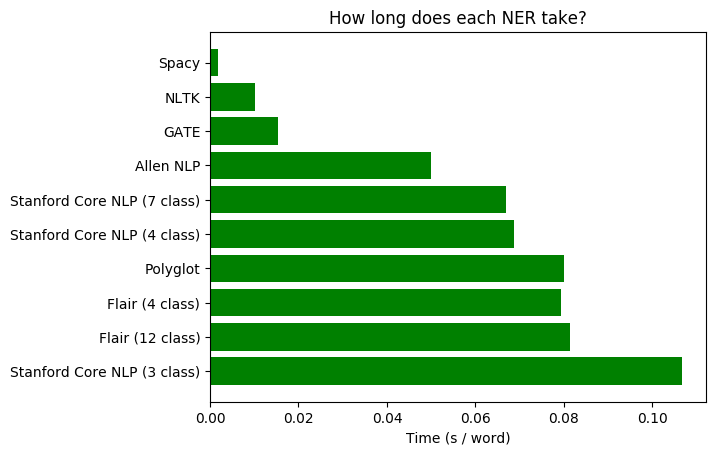

In [55]:
%matplotlib inline  

import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

n_words = len(test["text"].split())
ners = ('Spacy', 'NLTK',  'GATE',  'Allen NLP', 'Stanford Core NLP (7 class)', 'Stanford Core NLP (4 class)', 'Polyglot', 'Flair (4 class)', 'Flair (12 class)', 'Stanford Core NLP (3 class)')
performance = [spacy_time/n_words, nltk_time/n_words, gate_time/n_words,  allen_time/n_words, stanford_time3/n_words, stanford_time2/n_words, poly_time/n_words, flair_time4/n_words, flair_time12/n_words, stanford_time1/n_words]
y_pos = np.arange(len(ners))

ax.barh(y_pos, performance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(ners)
ax.invert_yaxis()  
ax.set_xlabel('Time (s / word)')
ax.set_title('How long does each NER take?')

plt.show()

## Which is the best NER for finding entities?

In [0]:
def f1_score(Y, Y_hat, strict=False):
  e = .000001
  non_entities = {}
  true_positives = sum([max([1 if y == y_hat else .5 if y_hat in y else .5 if y in y_hat else 0 for y_hat in Y_hat]+ [0]) for y in Y]) # correctly identified
  if strict: true_positives = len(Y.intersection(Y_hat)) #if strict, only count exact entity matches and not partial matches (default)
  dY = Y ^ Y_hat 
  false_positives = len(Y_hat.intersection(dY)) # incorrectly identified
  false_negatives = len(Y) - true_positives # incorrectly rejected
  recall = true_positives / (true_positives + false_negatives + e)
  precision = true_positives / (true_positives + false_positives + e)
  return (2 * precision * recall) / (precision + recall + e)

In [46]:
expected_entities = {entity for entities in test["entities"].values() for entity in entities}
gate_entities = {entity.replace('(male)','').replace('(female)','').strip() for entity,_ in Y_gate}
polyglot_entities = {entity for entity,_ in Y_polyglot}
spacy_entities = {entity for entity,_ in Y_spacy}
nltk_entities = {entity for entity,_ in Y_nltk}
allen_entities = {entity for entity,_ in Y_allen}
stanford_entities1 = {entity for entity,_ in Y_stanford1}
stanford_entities2 = {entity for entity,_ in Y_stanford2}
stanford_entities3 = {entity for entity,_ in Y_stanford3}
flair_entities4 = {entity for entity,_ in Y_flair4}
flair_entities12 = {entity for entity,_ in Y_flair12}

print(f"Expected = 100.0%\n\t{sorted(expected_entities)}\n")
f1_flair4 = f1_score(expected_entities, flair_entities4)
print(f"Flair (4 class) = {f1_flair4*100}%\n\t{sorted(flair_entities4)}\n")
f1_flair12 = f1_score(expected_entities, flair_entities12)
print(f"Flair (12 class) = {f1_flair12*100}%\n\t{sorted(flair_entities12)}\n")
f1_gate = f1_score(expected_entities, gate_entities)
print(f"GATE = {f1_gate*100}%\n\t{sorted(gate_entities)}\n")
f1_poly = f1_score(expected_entities, polyglot_entities)
print(f"Polyglot = {f1_poly*100}%\n\t{sorted(polyglot_entities)}\n")
f1_spacy = f1_score(expected_entities, spacy_entities)
print(f"Spacy = {f1_spacy*100}%\n\t{sorted(spacy_entities)}\n")
f1_nltk = f1_score(expected_entities, nltk_entities)
print(f"NLTK = {f1_nltk*100}%\n\t{sorted(nltk_entities)}\n")
f1_stanford1 = f1_score(expected_entities, stanford_entities1)
print(f"Stanford Core NLP (3 class) = {f1_stanford1*100}%\n\t{sorted(stanford_entities1)}\n")
f1_stanford2 = f1_score(expected_entities, stanford_entities2)
print(f"Stanford Core NLP (4 class) = {f1_stanford2*100}%\n\t{sorted(stanford_entities2)}\n")
f1_stanford3 = f1_score(expected_entities, stanford_entities3)
print(f"Stanford Core NLP (7 class) = {f1_stanford3*100}%\n\t{sorted(stanford_entities3)}\n")
f1_allen = f1_score(expected_entities, allen_entities)
print(f"Allen NLP = {f1_allen*100}%\n\t{sorted(allen_entities)}\n")

Expected = 100.0%
	['1936', 'Duchess', 'Duke', 'Elizabeth', 'King Edward VIII', 'King George VI', 'London', 'Queen Elizabeth', 'York']

Flair (4 class) = 51.42851559188594%
	['Duchess of York,', 'Edward VIII', 'Elizabeth', 'Elizabeth,', 'George VI', 'London']

Flair (12 class) = 59.99994450004136%
	['1936', 'Edward VIII', 'Elizabeth', 'George VI', 'London', 'Queen Elizabeth,', 'first', 'the Duke and Duchess of York,']

GATE = 84.21046759005813%
	['1936', 'Duchess', 'Duke', 'Edward VIII', 'Elizabeth', 'George VI', 'London', 'Queen Elizabeth', 'York']

Polyglot = 94.1175861591972%
	['Duchess', 'Duke', 'Elizabeth', 'King Edward VIII', 'King George VI', 'London', 'Queen Elizabeth', 'York']

Spacy = 66.6666089991195%
	['1936', 'Elizabeth', 'George VI', 'King Edward VIII', 'London', 'Queen Elizabeth', 'first']

NLTK = 66.66660925929759%
	['Duchess of York', 'Duke', 'Edward VIII', 'Elizabeth', 'George VI', 'London', 'Queen Elizabeth']

Stanford Core NLP (3 class) = 43.902385484886%
	['Duke', 

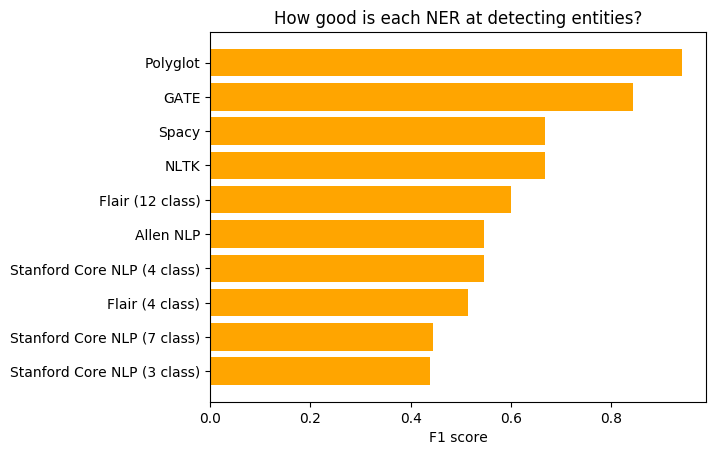

In [53]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

ners = ('Polyglot', 'GATE', 'Spacy', 'NLTK', 'Flair (12 class)', 'Allen NLP', 'Stanford Core NLP (4 class)', 'Flair (4 class)', 'Stanford Core NLP (7 class)', 'Stanford Core NLP (3 class)')
performance = [f1_poly, f1_gate, f1_spacy, f1_nltk, f1_flair12, f1_allen, f1_stanford2, f1_flair4, f1_stanford3, f1_stanford1]
y_pos = np.arange(len(ners))

ax.barh(y_pos, performance, align='center', color='orange', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(ners)
ax.invert_yaxis()  
ax.set_xlabel('F1 score')
ax.set_title('How good is each NER at detecting entities?')

plt.show()

## Which is the best NER for correctly labelling entities?

In [48]:
flair4_people = {entity for entity,tag in Y_flair4 if tag == "PER"}
flair12_people = {entity for entity,tag in Y_flair12 if tag == "PERSON"}
gate_people = {entity.replace('(male)','').replace('(female)','').strip() for entity,tag in Y_gate if tag == "Person"}
polyglot_people = {entity for entity,tag in Y_polyglot if tag == "PER"}
spacy_people = {entity for entity,tag in Y_spacy if tag == "PERSON"}
nltk_people = {entity for entity,tag in Y_nltk if tag == "PERSON"}
stanford_people1 = {entity for entity,tag in Y_stanford1 if tag == "PERSON"}
stanford_people2 = {entity for entity,tag in Y_stanford2 if tag == "PERSON"}
stanford_people3 = {entity for entity,tag in Y_stanford3 if tag == "PERSON"}
allen_people = {entity for entity,tag in Y_allen if tag == "PERSON"}

flair4_dates = {entity for entity,tag in Y_flair4 if tag == "DATE"}
flair12_dates = {entity for entity,tag in Y_flair12 if tag == "DATE"}
gate_dates = {entity for entity,tag in Y_gate if tag == "Date"}
polyglot_dates = {entity for entity,tag in Y_polyglot if tag == "DATE"}
spacy_dates = {entity for entity,tag in Y_spacy if tag == "DATE"}
nltk_dates = {entity for entity,tag in Y_nltk if tag == "DATE"}
stanford_dates1 = {entity for entity,tag in Y_stanford1 if tag == "DATE"}
stanford_dates2 = {entity for entity,tag in Y_stanford2 if tag == "DATE"}
stanford_dates3 = {entity for entity,tag in Y_stanford3 if tag == "DATE"}
allen_dates = {entity for entity,tag in Y_allen if tag == "DATE"}

flair4_locations = {entity for entity,tag in Y_flair4 if tag == "LOC"}
flair12_locations = {entity for entity,tag in Y_flair12 if tag == "GPE"}
gate_locations = {entity for entity,tag in Y_gate if tag == "Location"}
polyglot_locations = {entity for entity,tag in Y_polyglot if tag == "LOC"}
spacy_locations = {entity for entity,tag in Y_spacy if tag == "GPE"}
nltk_locations = {entity for entity,tag in Y_nltk if tag == "GPE"}
stanford_locations1 = {entity for entity,tag in Y_stanford1 if tag == "LOCATION"}
stanford_locations2 = {entity for entity,tag in Y_stanford2 if tag == "LOCATION"}
stanford_locations3 = {entity for entity,tag in Y_stanford3 if tag == "LOCATION"}
allen_locations = {entity for entity,tag in Y_allen if tag == "GPE"}

f1_flair4_ppl = f1_score(test["entities"]["people"], flair4_people)
f1_flair4_dts = f1_score(test["entities"]["dates"], flair4_dates)
f1_flair4_loc = f1_score(test["entities"]["locations"], flair4_locations)
print(f"Flair (4 class) \n\tPeople =\t{f1_flair4_ppl*100}%\t{flair4_people}\n\tLocations =\t{f1_flair4_loc*100}%\t{flair4_locations}\n\tDates =\t\t{f1_flair4_dts*100}%\t{flair4_dates}\n\n")
f1_flair12_ppl = f1_score(test["entities"]["people"], flair12_people)
f1_flair12_dts = f1_score(test["entities"]["dates"], flair12_dates)
f1_flair12_loc = f1_score(test["entities"]["locations"], flair12_locations)
print(f"Flair (12 class) \n\tPeople =\t{f1_flair12_ppl*100}%\t{flair12_people}\n\tLocations =\t{f1_flair12_loc*100}%\t{flair12_locations}\n\tDates =\t\t{f1_flair12_dts*100}%\t{flair12_dates}\n\n")
f1_gate_ppl = f1_score(test["entities"]["people"], gate_people)
f1_gate_dts = f1_score(test["entities"]["dates"], gate_dates)
f1_gate_loc = f1_score(test["entities"]["locations"], gate_locations)
print(f"GATE \n\tPeople =\t{f1_gate_ppl*100}%\t{gate_people}\n\tLocations =\t{f1_gate_loc*100}%\t{gate_locations}\n\tDates =\t\t{f1_gate_dts*100}%\t{gate_dates}\n\n")
f1_poly_ppl = f1_score(test["entities"]["people"], polyglot_people)
f1_poly_dts = f1_score(test["entities"]["dates"], polyglot_dates)
f1_poly_loc = f1_score(test["entities"]["locations"], polyglot_locations)
print(f"Polyglot \n\tPeople =\t{f1_poly_ppl*100}%\t{polyglot_people}\n\tLocations =\t{f1_poly_loc*100}%\t{polyglot_locations}\n\tDates =\t\t{f1_poly_dts*100}%\t{polyglot_dates}\n\n")
f1_spacy_ppl = f1_score(test["entities"]["people"], spacy_people)
f1_spacy_dts = f1_score(test["entities"]["dates"], spacy_dates)
f1_spacy_loc = f1_score(test["entities"]["locations"], spacy_locations)
print(f"Spacy \n\tPeople =\t{f1_spacy_ppl*100}%\t{spacy_people}\n\tLocations =\t{f1_spacy_loc*100}%\t{spacy_locations}\n\tDates =\t\t{f1_spacy_dts*100}%\t{spacy_dates}\n\n")
f1_nltk_ppl = f1_score(test["entities"]["people"], nltk_people)
f1_nltk_dts = f1_score(test["entities"]["dates"], nltk_dates)
f1_nltk_loc = f1_score(test["entities"]["locations"], nltk_locations)
print(f"NLTK \n\tPeople =\t{f1_nltk_ppl*100}%\t{nltk_people}\n\tLocations =\t{f1_nltk_loc*100}%\t{nltk_locations}\n\tDates =\t\t{f1_nltk_dts*100}%\t{nltk_dates}\n\n")
f1_stanford_ppl1 = f1_score(test["entities"]["people"], stanford_people1)
f1_stanford_dts1 = f1_score(test["entities"]["dates"], stanford_dates1)
f1_stanford_loc1 = f1_score(test["entities"]["locations"], stanford_locations1)
print(f"Stanford Core NLP (3 class)\n\tPeople =\t{f1_stanford_ppl1*100}%\t{stanford_people1}\n\tLocations =\t{f1_stanford_loc1*100}%\t{stanford_locations1}\n\tDates =\t\t{f1_stanford_dts1*100}%\t{stanford_dates1}\n\n")
f1_stanford_ppl2 = f1_score(test["entities"]["people"], stanford_people2)
f1_stanford_dts2 = f1_score(test["entities"]["dates"], stanford_dates2)
f1_stanford_loc2 = f1_score(test["entities"]["locations"], stanford_locations2)
print(f"Stanford Core NLP (4 class)\n\tPeople =\t{f1_stanford_ppl2*100}%\t{stanford_people2}\n\tLocations =\t{f1_stanford_loc2*100}%\t{stanford_locations2}\n\tDates =\t\t{f1_stanford_dts2*100}%\t{stanford_dates2}\n\n")
f1_stanford_ppl3 = f1_score(test["entities"]["people"], stanford_people3)
f1_stanford_dts3 = f1_score(test["entities"]["dates"], stanford_dates3)
f1_stanford_loc3 = f1_score(test["entities"]["locations"], stanford_locations3)
print(f"Stanford Core NLP (7 class)\n\tPeople =\t{f1_stanford_ppl3*100}%\t{stanford_people3}\n\tLocations =\t{f1_stanford_loc3*100}%\t{stanford_locations3}\n\tDates =\t\t{f1_stanford_dts3*100}%\t{stanford_dates3}\n\n")
f1_allen_ppl = f1_score(test["entities"]["people"], allen_people)
f1_allen_dts = f1_score(test["entities"]["dates"], allen_dates)
f1_allen_loc = f1_score(test["entities"]["locations"], allen_locations)
print(f"Allen NLP \n\tPeople =\t{f1_allen_ppl*100}%\t{allen_people}\n\tLocations =\t{f1_allen_loc*100}%\t{allen_locations}\n\tDates =\t\t{f1_allen_dts*100}%\t{allen_dates}\n\n")

Flair (4 class) 
	People =	46.15378934916695%	{'George VI', 'Duchess of York,', 'Elizabeth', 'Edward VIII', 'Elizabeth,'}
	Locations =	66.66657777782964%	{'London'}
	Dates =		0.0%	set()


Flair (12 class) 
	People =	51.85179478742796%	{'George VI', 'the Duke and Duchess of York,', 'Queen Elizabeth,', 'Elizabeth', 'Edward VIII'}
	Locations =	66.66657777782964%	{'London'}
	Dates =		99.99985000012501%	{'1936'}


GATE 
	People =	54.54539504136905%	{'Queen Elizabeth', 'Elizabeth', 'Edward VIII', 'George VI'}
	Locations =	99.99990000004999%	{'London', 'York'}
	Dates =		99.99985000012501%	{'1936'}


Polyglot 
	People =	92.30762840239572%	{'Queen Elizabeth', 'King Edward VIII', 'Duchess', 'King George VI', 'Duke', 'Elizabeth', 'York'}
	Locations =	66.66657777782964%	{'London'}
	Dates =		0.0%	set()


Spacy 
	People =	66.66660498870016%	{'King Edward VIII', 'Queen Elizabeth', 'Elizabeth', 'George VI'}
	Locations =	66.66657777782964%	{'London'}
	Dates =		99.99985000012501%	{'1936'}


NLTK 
	Peopl

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


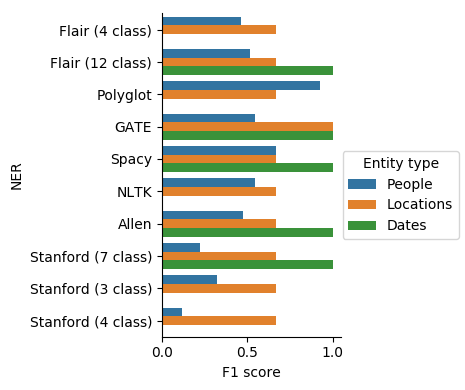

In [51]:
import pandas as pd

df = pd.DataFrame({
    "NER":["Flair (4 class)", "Flair (12 class)", "Polyglot","GATE","Spacy","NLTK","Allen","Stanford (7 class)","Stanford (3 class)","Stanford (4 class)"] *3,
    "Entity type":["People"] *10 + ["Locations"] *10 + ["Dates"]*10,
    "F1 score":[f1_flair4_ppl, f1_flair12_ppl, f1_poly_ppl, f1_gate_ppl, f1_spacy_ppl, f1_nltk_ppl, f1_allen_ppl,f1_stanford_ppl3,f1_stanford_ppl1,f1_stanford_ppl2, f1_flair4_loc, f1_flair12_loc, f1_poly_loc, f1_gate_loc, f1_spacy_loc, f1_nltk_loc, f1_allen_loc, f1_stanford_loc3,f1_stanford_loc1,f1_stanford_loc2, f1_flair4_dts, f1_flair12_dts, f1_poly_dts, f1_gate_dts, f1_spacy_dts, f1_nltk_dts,  f1_allen_dts, f1_stanford_dts3,f1_stanford_dts1,f1_stanford_dts2],
})


import seaborn as sns
sns.factorplot(x='F1 score',y='NER', hue='Entity type', data=df, kind='bar')

plt.show()

# Hierarchical Multi-Task Learning model (HMTL)

In [0]:
#!git clone https://github.com/huggingface/hmtl
#!hmtl/scripts/data_setup.sh
#!pip3 install emoji
#!pip3 install allennlp
#from hmtlPredictor import HMTLPredictor
#html = HMTLPredictor(model_name ="conll_full_elmo")
#hmtl.predict(example_document, raw_format = True)

# Train your own NER

In [0]:
!pip3 install nlp-architect

In [0]:
train,test = 'train.txt', 'test.txt'

sentence_length, word_length = 50, 12

from nlp_architect.data.sequential_tagging import SequentialTaggingDataset
dataset = SequentialTaggingDataset(train, test, max_sentence_length=sentence_length, max_word_length=word_length, tag_field_no=4)
x_train, x_char_train, y_train = dataset.train
x_test, x_char_test, y_test = dataset.test

In [0]:
from keras.utils import to_categorical
num_y_labels = len(dataset.y_labels) + 1
y_test = to_categorical(y_test, num_y_labels)
y_train = to_categorical(y_train, num_y_labels)
train_lengths = np.sum(np.not_equal(x_train, 0), axis=-1).reshape((-1, 1))
test_lengths = np.sum(np.not_equal(x_test, 0), axis=-1).reshape((-1, 1))

embedding_path = 'glove.6B.100d.txt'
embedding_size = 100

from nlp_architect.utils.embedding import get_embedding_matrix, load_word_embeddings
embedding_model, _ = load_word_embeddings(embedding_path)
embedding_mat = get_embedding_matrix(embedding_model, dataset.word_vocab)

In [0]:
from nlp_architect.models.ner_crf import NERCRF
ner_model = NERCRF()
ner_model.build(word_length,
                num_y_labels,
                dataset.word_vocab_size,
                dataset.char_vocab_size,
                word_embedding_dims=embedding_size)
ner_model.load_embedding_weights(embedding_mat)

In [0]:
batch_size, num_epochs = 10, 1

ner_model.fit(x=[x_train, x_char_train, train_lengths], y=y_train,
              batch_size=batch_size,
              epochs=num_epochs,
              validation=([x_test, x_char_test, test_lengths], y_test))

In [0]:
from nlp_architect.utils.metrics import get_conll_scores

predictions = ner_model.predict(x=[x_test, x_char_test, test_lengths], batch_size=1)
evaluation = get_conll_scores(predictions, y_test, {v: k for k, v in dataset.y_labels.vocab.items()})
evaluation